# CV Lab 6
# 211020450
# Shresht Mishra

In [2]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.signal import wiener

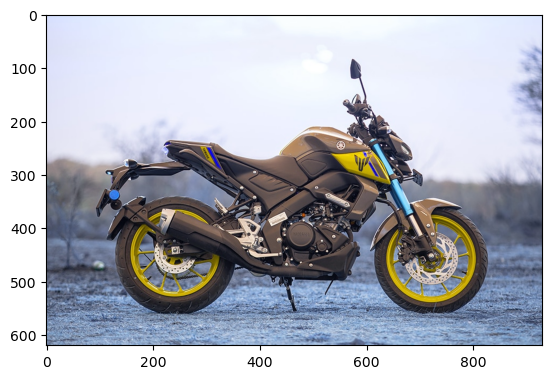

In [3]:
image = cv2.imread('Bike9.jpg')
plt.figure()
plt.imshow(image)
plt.show()

In [4]:
kernel_size=3
image= cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

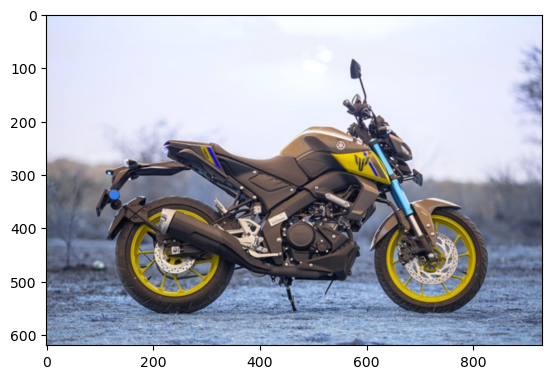

In [5]:
plt.figure()
plt.imshow(image)
plt.show()

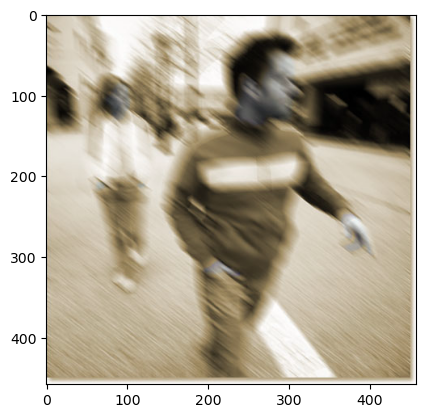

In [6]:
blur = cv2.imread('blur.jpg')
plt.figure()
plt.imshow(blur)
plt.show()

In [7]:
kernel_size=3
alpha=1.5
beta=-0.5

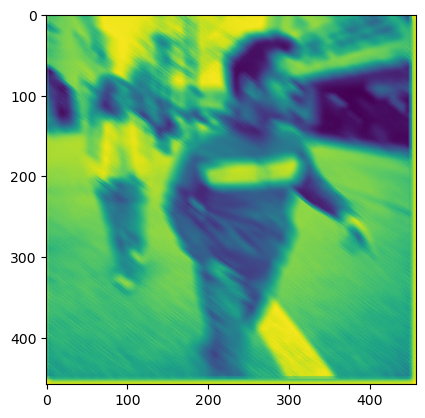

In [8]:
gray_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(gray_img, (kernel_size, kernel_size), 0)
laplacian = cv2.Laplacian(blurred_img, cv2.CV_64F)
deblur = gray_img + alpha * laplacian
deblur = np.clip(deblur, 0, 255)
deblur = np.uint8(deblur)
plt.figure()
plt.imshow(deblur)
plt.show()

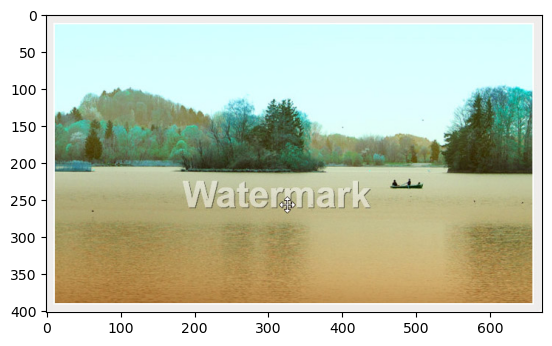

In [10]:
img = cv2.imread("orgimg.jpg")
mask = cv2.imread("watermark.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img)
plt.show()

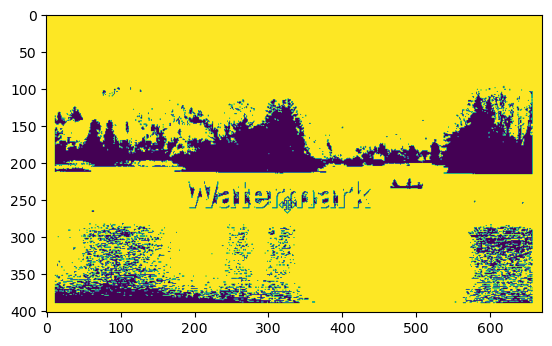

In [11]:
gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bg = gr.copy()
for i in range(5):
        kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
                                            (2 * i + 1, 2 * i + 1))
        bg = cv2.morphologyEx(bg, cv2.MORPH_CLOSE, kernel2)
        bg = cv2.morphologyEx(bg, cv2.MORPH_OPEN, kernel2)
dif = cv2.subtract(bg, gr)
bw = cv2.threshold(dif, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
dark = cv2.threshold(bg, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
darkpix = gr[np.where(dark > 0)]
darkpix = cv2.threshold(darkpix, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
bw[np.where(dark > 0)] = darkpix.T
plt.figure()
plt.imshow(bw)
plt.show()

In [2]:
from rembg import remove
from PIL import Image
input_image = Image.open('Bike9.jpg')
output = remove(input_image, alpha=True)
input_image=cv2.imread('Bike9.jpg')
plt.imshow(input_image)
output.save('background_removed_image.png')
output.show()
output=cv2.imread('background_removed_image.png')
plt.imshow(output)

ModuleNotFoundError: No module named 'rembg'